 ***Stock*** ***Price*** ***Prediction*** ***using*** ***Stack*** ***LSTM***




In [1]:
import pandas_datareader as pdr


In [2]:
df= pdr.get_data_tiingo('GOOG',api_key='79afc1024238cbe51eaccb301975b1e814b83cc1')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('GOOG.csv')

In [4]:
df.head()


close    high      low    open   volume  \
symbol date                                                                  
GOOG   2017-04-21 00:00:00+00:00  843.19  843.88  840.600  842.88  1323583   
       2017-04-24 00:00:00+00:00  862.76  863.45  849.860  851.20  1371581   
       2017-04-25 00:00:00+00:00  872.30  875.00  862.810  865.00  1654161   
       2017-04-26 00:00:00+00:00  871.73  876.05  867.748  874.23  1188464   
       2017-04-27 00:00:00+00:00  874.25  875.40  870.380  873.60  1734197   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
GOOG   2017-04-21 00:00:00+00:00    843.19   843.88  840.600   842.88   
       2017-04-24 00:00:00+00:00    862.76   863.45  849.860   851.20   
       2017-04-25 00:00:00+00:00    872.30   875.00  862.810   865.00   
       2017-04-26 00:00:00+00:00    871.73   876.05  867.748   874.23   
       2017-04-27 00:00:00+00:00    874.25   875.40  870.380   873.60   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2017-04-21 00:00:00+00:00    1323583      0.0          1.0  
       2017-04-24 00:00:00+00:00    1371581      0.0          1.0  
       2017-04-25 00:00:00+00:00    1654161      0.0          1.0  
       2017-04-26 00:00:00+00:00    1188464      0.0          1.0  
       2017-04-27 00:00:00+00:00    1734197      0.0          1.0

In [5]:
df.tail()

close      high        low     open  \
symbol date                                                               
GOOG   2022-04-12 00:00:00+00:00  2567.49  2648.470  2551.5200  2648.47   
       2022-04-13 00:00:00+00:00  2605.72  2613.115  2568.7719  2572.53   
       2022-04-14 00:00:00+00:00  2545.06  2614.205  2542.2300  2612.99   
       2022-04-18 00:00:00+00:00  2559.22  2574.240  2531.5693  2548.20   
       2022-04-19 00:00:00+00:00  2610.62  2618.075  2549.0300  2561.54   

                                   volume  adjClose   adjHigh     adjLow  \
symbol date                                                                
GOOG   2022-04-12 00:00:00+00:00  1150161   2567.49  2648.470  2551.5200   
       2022-04-13 00:00:00+00:00   977148   2605.72  2613.115  2568.7719   
       2022-04-14 00:00:00+00:00  1174168   2545.06  2614.205  2542.2300   
       2022-04-18 00:00:00+00:00   745860   2559.22  2574.240  2531.5693   
       2022-04-19 00:00:00+00:00  1135965   2610.62  2618.075  2549.0300   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
GOOG   2022-04-12 00:00:00+00:00  2648.47    1150161      0.0          1.0  
       2022-04-13 00:00:00+00:00  2572.53     977148      0.0          1.0  
       2022-04-14 00:00:00+00:00  2612.99    1174168      0.0          1.0  
       2022-04-18 00:00:00+00:00  2548.20     745860      0.0          1.0  
       2022-04-19 00:00:00+00:00  2561.54    1135965      0.0          1.0

In [6]:
df2=df.reset_index()['close']

In [7]:
df2.shape

(1258,)

In [8]:
df2

0        843.19
1        862.76
2        872.30
3        871.73
4        874.25
         ...   
1253    2567.49
1254    2605.72
1255    2545.06
1256    2559.22
1257    2610.62
Name: close, Length: 1258, dtype: float64

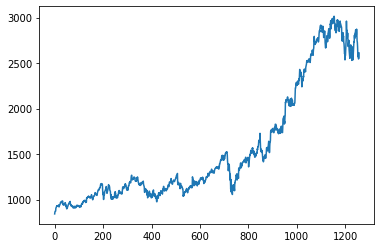

In [9]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [10]:
import numpy as np


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [12]:
df2

array([[0.        ],
       [0.00901432],
       [0.01340863],
       ...,
       [0.78391425],
       [0.79043662],
       [0.81411246]])

In [13]:
training_size= int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [14]:
import numpy
def create_dataset(dataset,time_step=1):
  dataX, dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a= dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [15]:
time_step=100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test= create_dataset(test_data, time_step)


In [16]:
print(X_train.shape) ,print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [17]:
print(X_test.shape) , print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [18]:
#reshape the input to be [sample , time step, features] for LSTM
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [19]:
#create a LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 314ms/step - loss: 0.0100 - val_loss: 0.1649
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0023 - val_loss: 0.1238
Epoch 3/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0016 - val_loss: 0.0899
Epoch 4/100
12/12 [==============================] - 2s 195ms/step - loss: 9.3007e-04 - val_loss: 0.0089
Epoch 5/100
12/12 [==============================] - 2s 194ms/step - loss: 6.6766e-04 - val_loss: 0.0031
Epoch 6/100
12/12 [==============================] - 2s 196ms/step - loss: 7.2052e-04 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 2s 201ms/step - loss: 6.6117e-04 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 2s 199ms/step - loss: 6.4779e-04 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 2s 198ms/step - loss: 5.9647e-04 - val_loss: 0.0041
Epoch 10/100
12/12 [==============================] - 2s 199ms/ste

In [23]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012569771672922881

In [26]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.21671960412622324

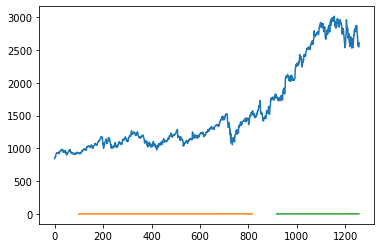

In [27]:
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

441

In [29]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.9632287573871827,
 0.9271945057324078,
 0.9576690818474523,
 0.9239333207430711,
 0.9162501900054814,
 0.9361351272921572,
 0.9245643692508947,
 0.9363193750316674,
 0.9753798958079034,
 0.981681168499164,
 0.9760201567027025,
 0.9812620048917775,
 0.9631089963565009,
 0.9471347173409366,
 0.9692260213082511,
 0.9459186822601671,
 0.9271668685714811,
 0.9234680952008072,
 0.9402254271092911,
 0.9653614249720175,
 0.9671440218517819,
 0.9756332364497304,
 0.9607460190972783,
 0.9612665189613956,
 0.9566419006996809,
 0.9444539127310583,
 0.9480928055863913,
 0.9420310549564945,
 0.8797276818410036,
 0.8787834121760119,
 0.8737488426938862,
 0.8882076840519764,
 0.90150576465115,
 0.9165265616147471,
 0.8933389835973449,
 0.8993777032598032,
 0.8671711983933597,
 0.8612890893094856,
 0.8415239130534917,
 0.8100682177255538,
 0.8126476860787015,
 0.7791468408421964,
 0.8022192640224046,
 0.8011229899723169,
 0.8395248250798022,
 0.8617174653038475,
 0.881800468910497,
 0.97537989580790

In [32]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0616194]
101
1 day input [0.92719451 0.95766908 0.92393332 0.91625019 0.93613513 0.92456437
 0.93631938 0.9753799  0.98168117 0.97602016 0.981262   0.963109
 0.94713472 0.96922602 0.94591868 0.92716687 0.9234681  0.94022543
 0.96536142 0.96714402 0.97563324 0.96074602 0.96126652 0.9566419
 0.94445391 0.94809281 0.94203105 0.87972768 0.87878341 0.87374884
 0.88820768 0.90150576 0.91652656 0.89333898 0.8993777  0.8671712
 0.86128909 0.84152391 0.81006822 0.81264769 0.77914684 0.80221926
 0.80112299 0.83952483 0.86171747 0.88180047 0.9753799  0.92576198
 0.92912911 0.89156099 0.8940944  0.91473015 0.88847024 0.84726784
 0.85804633 0.86841487 0.87819843 0.83048747 0.81352747 0.80371628
 0.78697276 0.83384999 0.85085606 0.85427846 0.84761791 0.85299333
 0.84890764 0.82876936 0.77665028 0.78414917 0.84483577 0.8339283
 0.81360117 0.77919751 0.80609307 0.84321899 0.85160226 0.87187873
 0.86890313 0.90390099 0.88755821 0.9134312  0.91536119 0.9193087
 0.93128481 0.92570671 0.89811561 0.9077

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
import matplotlib.pyplot as plt

In [35]:
len(df2)

1258

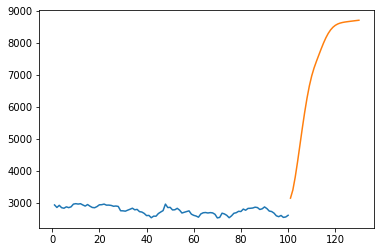

In [36]:
plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

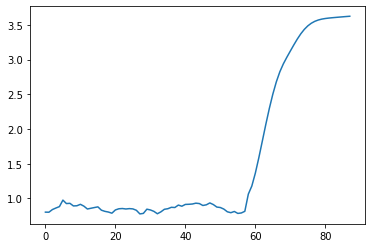

In [37]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [38]:
df3=scaler.inverse_transform(df3).tolist()

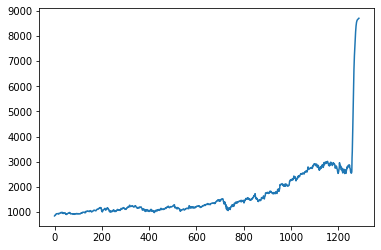

In [39]:
plt.plot(df3)